In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### we can see that there are missing values for `Age`

In [4]:
cat_feat = ['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked']
train_data.drop(cat_feat, axis=1, inplace=True)
train_data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


#### Now that we've dropped the non continuous features, we can group the data by 'Survived' and see what we got

In [5]:
train_data.groupby('Survived').mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


##### we can see that `Fare` is a clear separator from the quick look at the mean, let's check the distribution histogram to be sure

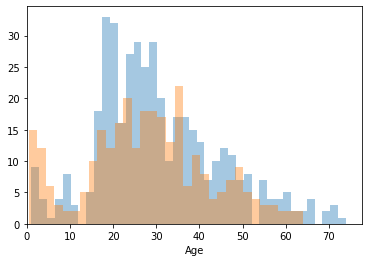

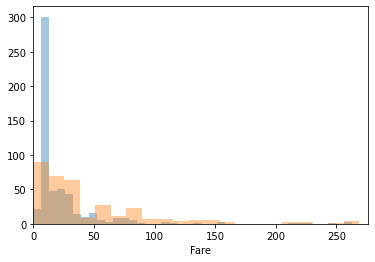

In [6]:
for i, col in enumerate(['Age','Fare']):
    plt.figure(i)
    died = train_data[train_data['Survived']==0][col]
    survived = train_data[train_data['Survived']==1][col]
    sns.distplot(died, kde=False, bins=40)
    plt.xlim(0, None)
    sns.distplot(survived, kde=False, bins=40)
    plt.xlim(0, None)

##### we can see that the distributions are not clearly separated

#### Let's check if `Age` is missing at random

In [7]:
train_data.groupby(train_data['Age'].isnull()).mean()

,Survived,Age,Fare
Age,,,
False,0.406162,29.699118,34.694514
True,0.293785,NaN,22.158567


Let's check the discrete features

In [8]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data.head(10)

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
5,0,29.699118,8.4583
6,0,54.000000,51.8625
7,0,2.000000,21.0750
8,1,27.000000,11.1333
9,1,14.000000,30.0708


In [9]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
cont_feat = ['PassengerId','Name','Ticket','Fare','Age']
train_data.drop(cont_feat, axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,3,male,1,0,NaN,S
1,1,1,female,1,0,C85,C
2,1,3,female,0,0,NaN,S
3,1,1,female,1,0,C123,S
4,0,3,male,0,0,NaN,S


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   SibSp     891 non-null    int64 
 4   Parch     891 non-null    int64 
 5   Cabin     204 non-null    object
 6   Embarked  889 non-null    object
dtypes: int64(4), object(3)
memory usage: 48.9+ KB


In [12]:
train_data.groupby('Survived').mean()

,Pclass,SibSp,Parch
Survived,,,
0,2.531876,0.553734,0.329690
1,1.950292,0.473684,0.464912


In [13]:
train_data['Survived'].groupby(train_data['Cabin'].isnull()).mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [14]:
train_data['Cabin_ind'] = np.where(train_data['Cabin'].isnull(),0,1)
train_data.drop('Cabin', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_ind
0,0,3,male,1,0,S,0
1,1,1,female,1,0,C,1
2,1,3,female,0,0,S,0
3,1,1,female,1,0,S,1
4,0,3,male,0,0,S,0


<Figure size 432x288 with 0 Axes>

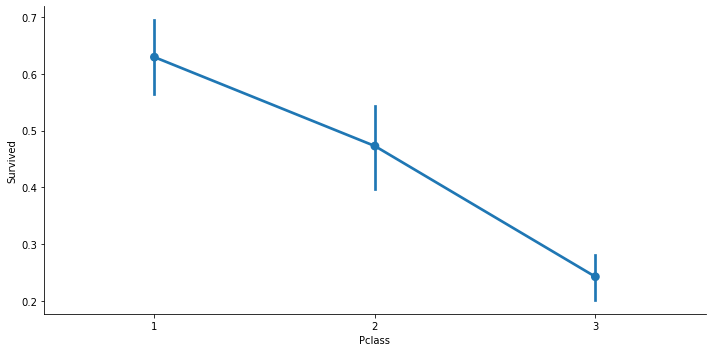

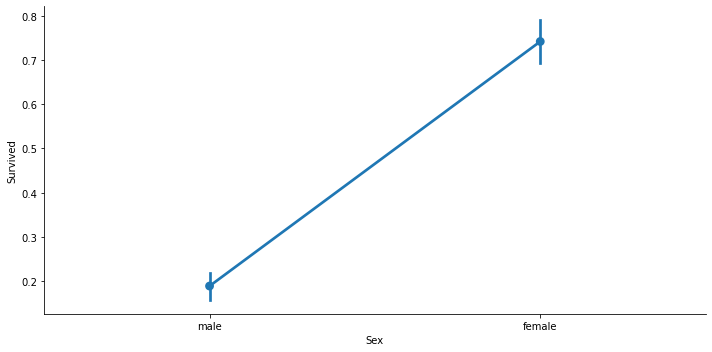

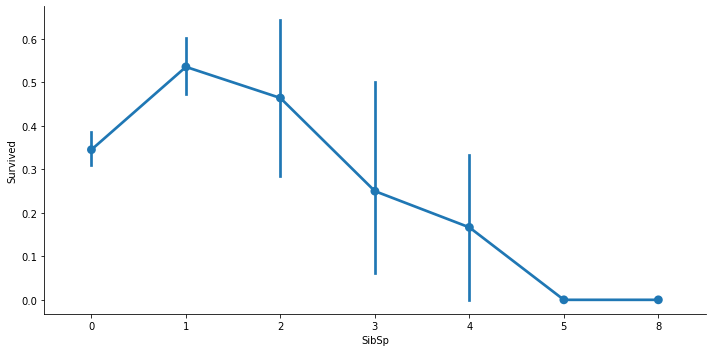

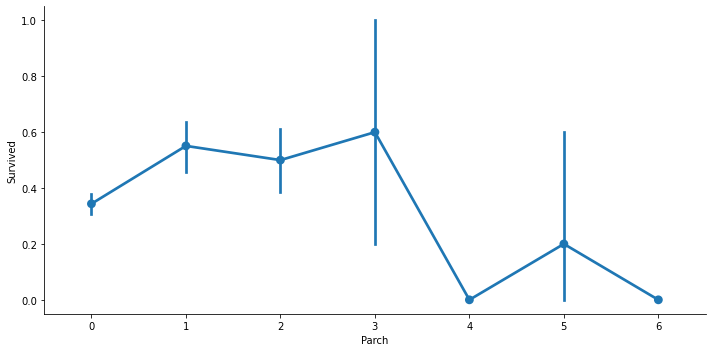

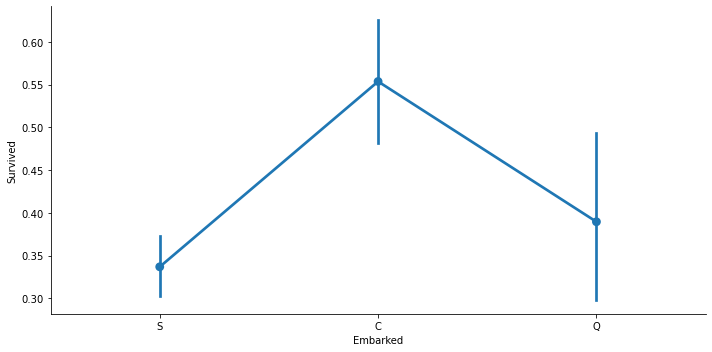

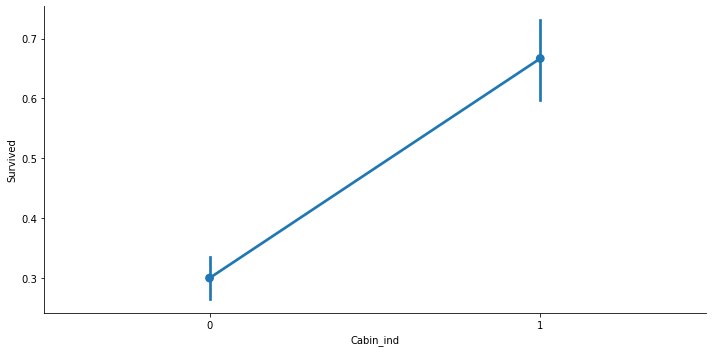

In [15]:
for i, col in enumerate(['Pclass','Sex','SibSp','Parch','Embarked', 'Cabin_ind']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=train_data, kind='point', aspect=2)

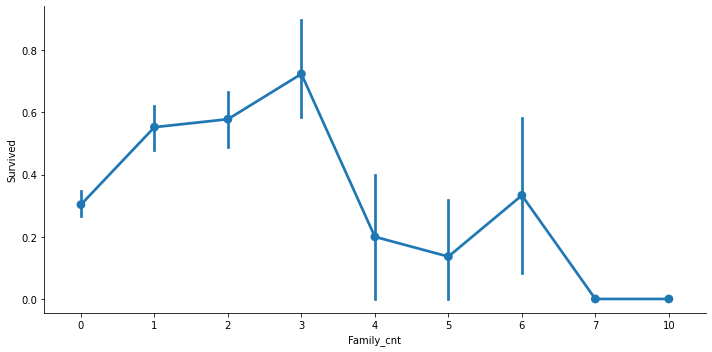

In [16]:
train_data['Family_cnt'] = train_data['SibSp'] + train_data['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=train_data, kind='point', aspect=2)

In [17]:
train_data.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [18]:
train_data.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


In [19]:
gender_num = {"male":0,"female":1}
train_data['Sex'] = train_data['Sex'].map(gender_num)
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_ind,Family_cnt
0,0,3,0,1,0,S,0,1
1,1,1,1,1,0,C,1,1
2,1,3,1,0,0,S,0,0
3,1,1,1,1,0,S,1,1
4,0,3,0,0,0,S,0,0


### Finalizing the data

In [20]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

gender_num = {"male":0,"female":1}
train_data['Sex'] = train_data['Sex'].map(gender_num)

train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Family_cnt'] = train_data['SibSp'] + train_data['Parch']

train_data['Cabin_ind'] = np.where(train_data['Cabin'].isnull(),0,1)
train_data.drop(['SibSp','Parch','Cabin','PassengerId','Name','Ticket','Embarked'], axis=1, inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.000000,7.2500,1,0
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,1,1
4,0,3,0,35.000000,8.0500,0,0
5,0,3,0,29.699118,8.4583,0,0
6,0,1,0,54.000000,51.8625,0,1
7,0,3,0,2.000000,21.0750,4,0
8,1,3,1,27.000000,11.1333,2,0
9,1,2,1,14.000000,30.0708,1,0


In [21]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

# train data
features = ["Pclass", "Sex", "Age", "Fare",'Family_cnt','Cabin_ind']
X = pd.get_dummies(train_data[features])

# test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

gender_num = {"male":0,"female":1}
test_data['Sex'] = test_data['Sex'].map(gender_num)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data['Family_cnt'] = test_data['SibSp'] + test_data['Parch']

test_data['Cabin_ind'] = np.where(test_data['Cabin'].isnull(),0,1)
test_data.drop(['SibSp','Parch','Cabin','Name','Ticket','Embarked'], axis=1, inplace=True)
X_test = pd.get_dummies(test_data[features])

# model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('LinkedIn_Learning.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [22]:
my_data = pd.read_csv("/kaggle/working/LinkedIn_Learning.csv")
my_data.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
